In [1]:
# PCA
# KMeans Clustering
# No predictive models

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn. cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
movie =pd. read_csv("movie_metadata.csv")

In [6]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
str_list = []
for colname, colvalue in movie.iteritems():
    if type(colvalue[1])==str:
        str_list.append(colname)
    
num_list = movie.columns.difference(str_list)

In [10]:
movie_num=movie[num_list]

In [11]:
movie_num.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,NaN,NaN,NaN,143,131.0,NaN,0.0,NaN,7.1,0,NaN,NaN,8,NaN


In [13]:
movie_num.isnull()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,True,False,True,False,False,True,True,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
movie_num=movie_num.fillna(value=0, axis=1)

In [15]:
X=movie_num.values
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

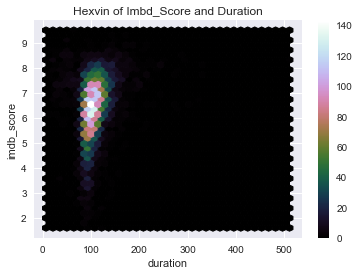

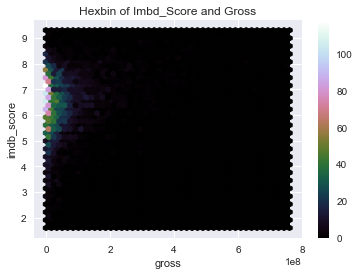

In [22]:
movie.plot(y='imdb_score',x='duration',kind='hexbin',
          gridsize=35,sharex=False, colormap='cubehelix',
          title='Hexvin of Imbd_Score and Duration')
movie.plot(y='imdb_score', x='gross', kind='hexbin',
           gridsize=45,sharex=False,colormap='cubehelix',
          title='Hexbin of Imbd_Score and Gross')